In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/intrusion_dataset/UNSW_NB15_training-set.csv')
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


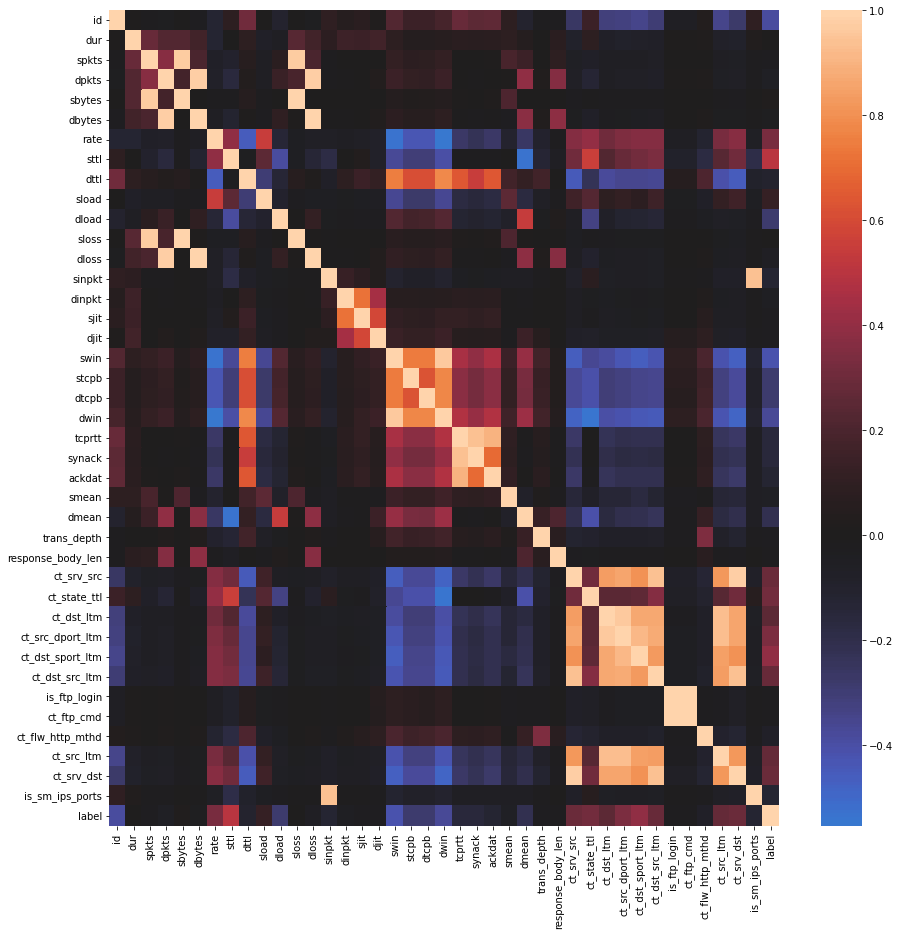

In [ ]:
# correlation matrix
corr_mat = train.corr() 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, center=0,ax=ax)

In [ ]:
columns = corr_mat.columns
print("Percentage correlation is")
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {(corr_mat.iloc[i, j])*100}")


Percentage correlation is
spkts                sbytes               96.57497410287415
spkts                sloss                97.36439932787799
dpkts                dbytes               97.64185516958216
dpkts                dloss                98.15064328008421
sbytes               sloss                99.502719113184
dbytes               dloss                99.71088501020647
sinpkt               is_sm_ips_ports      94.45057600994802
swin                 dwin                 96.01246970559345
tcprtt               synack               93.94732071062887
ct_srv_src           ct_dst_src_ltm       93.37952137616566
ct_srv_src           ct_srv_dst           97.78491535974652
ct_dst_ltm           ct_src_dport_ltm     96.04008284955233
ct_dst_ltm           ct_src_ltm           93.22524473427765
ct_src_dport_ltm     ct_dst_sport_ltm     91.16374681078989
ct_src_dport_ltm     ct_src_ltm           93.31720623302827
ct_dst_src_ltm       ct_srv_dst           94.10468630509295
is_ftp_login    

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/intrusion_dataset/UNSW_NB15_testing-set.csv")

In [ ]:
train.shape,test.shape

((82332, 45), (175341, 45))

## Dataset summary

In [ ]:
if train.shape[0]<100000:
    print("Train and test sets are interchanged. Setting it correct.")
    train, test = test, train

Train and test sets are interchanged. Setting it correct.


In [ ]:
train.sample(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
122845,122846,1.170872,tcp,http,FIN,10,10,810,1132,16.227222,...,1,1,0,0,1,3,1,0,Exploits,1
37607,37608,4.130060,tcp,-,FIN,50,54,3848,19188,24.939104,...,1,2,0,0,0,1,11,0,Normal,0
122057,122058,0.000003,udp,dns,INT,2,0,114,0,333333.321500,...,16,20,0,0,0,18,20,0,Generic,1
51220,51221,0.000008,kryptolan,-,INT,2,0,200,0,125000.000300,...,2,2,0,0,0,20,2,0,Exploits,1
5539,5540,0.001015,udp,dns,CON,2,2,130,162,2955.664893,...,1,6,0,0,0,5,2,0,Normal,0
146093,146094,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,14,25,0,0,0,36,25,0,Generic,1
37145,37146,1.045871,tcp,http,FIN,14,18,1684,10168,29.640366,...,1,1,0,0,1,4,1,0,Normal,0
170380,170381,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,17,17,0,0,0,17,17,0,Generic,1
126686,126687,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,16,26,0,0,0,16,26,0,Generic,1
159349,159350,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,17,23,0,0,0,18,23,0,Generic,1


In [ ]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

So, to summarize, we have 4 categorical features 'attack_cat','proto','service' and 'state'. There are no null values present.

### Target variable analysis

Text(0.5, 1.0, 'Distribution of attack')

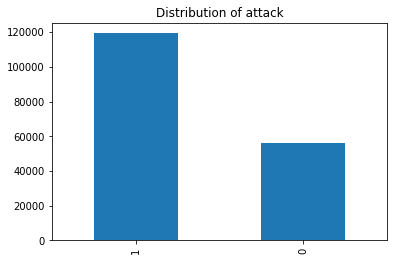

In [ ]:
train['label'].value_counts().plot.bar()
plt.title("Distribution of attack")

In [ ]:
train['label'].value_counts() / len(train) * 100 

1    68.062233
0    31.937767
Name: label, dtype: float64

In [ ]:
train['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

## Data Preprocessing

In [ ]:
drop_columns = ['attack_cat', 'id'] + ['response_body_len', 'spkts', 'ct_flw_http_mthd', 'trans_depth', 'dwin', 'ct_ftp_cmd', 'is_ftp_login']
for df in [train, test]:
    for col in drop_columns:
        if col in df.columns:
            print('Dropping '+col)
            df.drop([col], axis=1, inplace=True)

Dropping attack_cat
Dropping id
Dropping response_body_len
Dropping spkts
Dropping ct_flw_http_mthd
Dropping trans_depth
Dropping dwin
Dropping ct_ftp_cmd
Dropping is_ftp_login
Dropping attack_cat
Dropping id
Dropping response_body_len
Dropping spkts
Dropping ct_flw_http_mthd
Dropping trans_depth
Dropping dwin
Dropping ct_ftp_cmd
Dropping is_ftp_login


In [ ]:
def feature_engineer(df):
    df.loc[~df['state'].isin(['FIN', 'INT', 'CON', 'REQ', 'RST']), 'state'] = 'others'
    df.loc[~df['service'].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']), 'service'] = 'others'
    df.loc[df['proto'].isin(['igmp', 'icmp', 'rtp']), 'proto'] = 'igmp_icmp_rtp'
    df.loc[~df['proto'].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), 'proto'] = 'others'
    return df

def get_cat_columns(train):
    categorical = []
    for col in train.columns:
        if train[col].dtype == 'object':
            categorical.append(col)
    return categorical

In [ ]:
x_train, y_train = train.drop(['label'], axis=1), train['label']
x_test, y_test = test.drop(['label'], axis=1), test['label']

x_train, x_test = feature_engineer(x_train), feature_engineer(x_test)

categorical_columns = get_cat_columns(x_train)
non_categorical_columns = [x for x in x_train.columns if x not in categorical_columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[non_categorical_columns] = scaler.fit_transform(x_train[non_categorical_columns])
x_test[non_categorical_columns] = scaler.transform(x_test[non_categorical_columns])


x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
print("Column mismatch {0}, {1}".format(set(x_train.columns)- set(x_test.columns),  set(x_test.columns)- set(x_train.columns)))
features = list(set(x_train.columns) & set(x_test.columns))


Column mismatch set(), set()


In [ ]:

print(f"Number of features {len(features)}")
x_train = x_train[features]
x_test = x_test[features]

Number of features 53


In [ ]:
x_train.head()

,is_sm_ips_ports,proto_udp,state_FIN,ct_dst_src_ltm,smean,ct_srv_dst,service_ftp-data,state_INT,dur,dinpkt,...,ct_src_dport_ltm,proto_tcp,service_ftp,sloss,ct_src_ltm,stcpb,service_ssh,sjit,ct_srv_src,ackdat
0,-0.126508,0,1,-0.705529,-0.458048,-0.753074,0,0,-0.191029,-0.080885,...,-0.544736,1,0,-0.075040,-0.715714,-0.256392,0,-0.109997,-0.775991,-0.503014
1,-0.126508,0,1,-0.614256,-0.414076,-0.288257,0,0,-0.109485,-0.073735,...,-0.544736,1,0,-0.044739,-0.715714,0.331031,0,-0.109302,3.147666,-0.503014
2,-0.126508,0,1,-0.522983,-0.443391,-0.288257,0,0,0.040699,0.014711,...,-0.544736,1,0,-0.059890,-0.595543,0.846258,0,0.271392,-0.215468,0.742202
3,-0.126508,0,1,-0.522983,-0.414076,-0.753074,0,0,0.049729,0.002046,...,-0.544736,1,1,-0.059890,-0.595543,0.101729,0,-0.104906,-0.775991,-0.503014
4,-0.126508,0,1,2.854115,-0.409190,2.779535,0,0,-0.140417,-0.012721,...,-0.420468,1,0,-0.044739,-0.595543,1.082366,0,-0.056942,3.147666,0.909954


## Model 

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x_test,y_test))

0.813535441869504


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# view confusion-matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[22570 14430]
 [  922 44410]]

True Positives(TP) =  22570

True Negatives(TN) =  44410

False Positives(FP) =  14430

False Negatives(FN) =  922


## SVM

In [ ]:
from sklearn import svm,preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8157217120925035


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[22067 14933]
 [  239 45093]]

True Positives(TP) =  22067

True Negatives(TN) =  45093

False Positives(FP) =  14933

False Negatives(FN) =  239


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74     37000
           1       0.75      0.99      0.86     45332

    accuracy                           0.82     82332
   macro avg       0.87      0.80      0.80     82332
weighted avg       0.86      0.82      0.81     82332

